In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline
plt.style.use("dark_background")

In [2]:
!wget -O FuelConsumption.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv

--2021-09-28 12:57:37--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.45.118.108
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.45.118.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: ‘FuelConsumption.csv’

FuelConsumption.csv 100%[===================>]  70.93K   433KB/s    in 0.2s    

2021-09-28 12:57:38 (433 KB/s) - ‘FuelConsumption.csv’ saved [72629/72629]



In [4]:
df = pd.read_csv('FuelConsumption.csv')
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [7]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)
cdf.size

6402

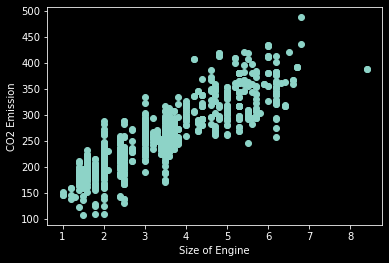

In [6]:
plt.scatter(cdf[["ENGINESIZE"]], cdf[["CO2EMISSIONS"]])
plt.xlabel("Size of Engine")
plt.ylabel("CO2 Emission")
plt.show()

In [8]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

5028


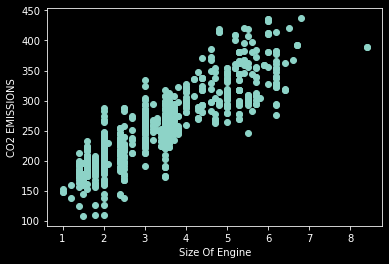

In [24]:
plt.scatter(train[["ENGINESIZE"]], train[["CO2EMISSIONS"]])
plt.xlabel("Size Of Engine")
plt.ylabel("CO2 EMISSIONS")
plt.show()

In [27]:
from sklearn import linear_model
mlr = linear_model.LinearRegression()
xtrain = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
ytrain = np.asanyarray(train[['CO2EMISSIONS']])
mlr.fit(xtrain, ytrain)
print("Coef: ", mlr.coef_)
print("intercept: ", mlr.intercept_)

Coef:  [[10.44737766  7.46112178  9.56098084]]
intercept:  [67.11750488]


In [30]:
from sklearn.metrics import mean_squared_error
xtest = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
ytest = np.asanyarray(test[['CO2EMISSIONS']])
yhat = mlr.predict(xtest)
print("R2 Score", mlr.score(xtest, ytest))
print("MSE: ", mean_squared_error(ytest, yhat))

R2 Score 0.8730155458469716
MSE:  561.3479753993864


In [32]:
mlr = linear_model.LinearRegression()
xtrain = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']])
ytrain = np.asanyarray(train[['CO2EMISSIONS']])
mlr.fit(xtrain, ytrain)
print("Coef_", mlr.coef_)
print("Intercept_", mlr.intercept_)
xtest = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']])
ytest = np.asanyarray(test[['CO2EMISSIONS']])
yhat = mlr.predict(xtest)
print("R2 Score", mlr.score(xtest, ytest))
print("MSE: ", mean_squared_error(ytest, yhat))

Coef_ [[10.47186783  7.10392588  6.23009093  3.03810893]]
Intercept_ [68.21304963]
R2 Score 0.8726211391409088
MSE:  563.0914912290134
